# Метод главных компонент

ЗАДАНИЕ № 1. В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

In [1]:
import pandas as pd
import numpy as np

In [4]:
X = pd.read_csv('54_25.csv', header=None)
X.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-24.504942,23.577457,-13.013497,11.597908,18.342250,-2.258323,-10.217719,-1.890770,-13.694313,-3.427739
1,-8.712978,-16.467314,-15.739045,-15.125727,2.382873,-0.332771,-1.571359,-13.346995,16.901802,-0.560003
2,-4.947666,-5.762710,-15.296801,3.076486,-27.540477,24.642389,14.638834,14.044069,8.027701,-24.256865
3,-4.711577,-7.501066,-14.611638,2.005721,-26.131699,20.563434,13.587302,13.652482,6.261105,-21.125368
4,-2.027430,-6.786353,-15.435602,-0.508896,-24.222880,22.565825,12.672090,14.934825,4.896119,-22.900903


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #масштабируем данные

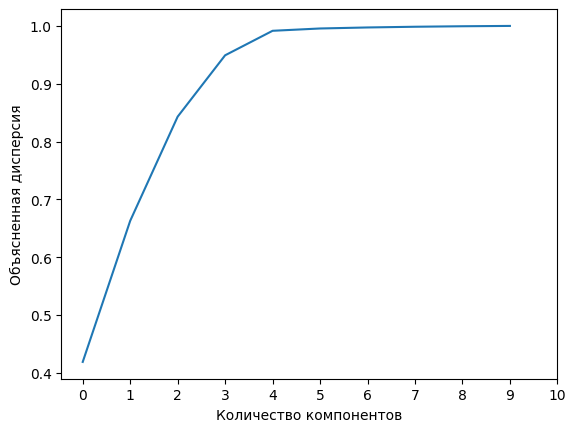

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA().fit(X_scaled) # применяем метод главных компонент к
# масштабируемым данным, чтобы видеть плавную картину, чем с изначальными
n_components = pca.explained_variance_ratio_.shape[0] # считаем количество компонент

#указываем долю дисперсии датасета, которую объясняет каждая главная компонента
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # строим график объединяя дисперсии предыдущих гк
plt.xticks(np.arange(0, n_components + 1, step=1))  # Устанавливаем шаг на оси X
plt.xlabel('Количество компонентов')
plt.ylabel('Объясненная дисперсия')
plt.show()

In [46]:
# Установим важные компоненты:
components = 3

# Применим преобразование метода главных компонент
# к данным,
# уменьшая их размерность до количества компонент(десяти)

pca = PCA(n_components=components)
X_pca = pca.fit_transform(X)

# Вычисление дисперсии, объясненной главными компонентами
print("Дисперсия каждой компоненты: ", pca.explained_variance_ratio_)
print("\n Общая объясненная дисперсия: ", sum(list(pca.explained_variance_ratio_)))

Дисперсия каждой компоненты:  [0.45996266 0.23486793 0.228131  ]

 Общая объясненная дисперсия:  0.9229615928977803


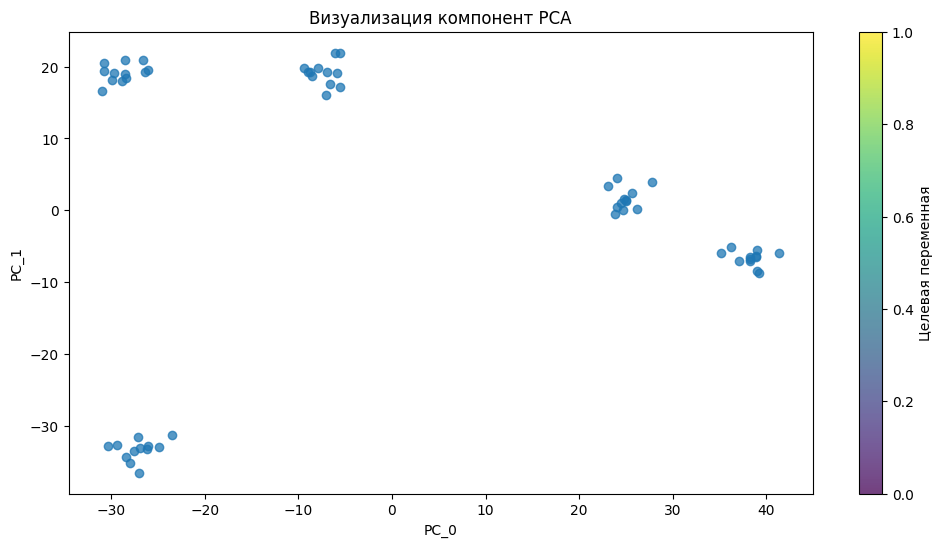

In [47]:
# scatter plot для первых двух компонент PCA

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.75)
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.title('Визуализация компонент PCA')
plt.colorbar(label='Целевая переменная')
plt.show()


In [48]:
# Названия столбцов после применения PCA
pca_cols = []
for i in range(components):
    pca_cols.append(f"PC_{i}")
print(pca_cols)

# ['PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9']


# Создание DataFrame
pca_df = pd.DataFrame(X_pca, columns=pca_cols)
pca_df.head(5)

#print(X_pca[0:2,0])
#print(X_pca[0:2,1])

['PC_0', 'PC_1', 'PC_2']


,PC_0,PC_1,PC_2
0,36.233437,-5.100437,-27.044760
1,-5.599414,17.202328,11.087101
2,-27.091883,-36.488642,3.293511
3,-24.892671,-32.863447,3.292981
4,-26.079082,-32.734983,1.746318


2.Задание. По заданным данным матрице счетов и матрице весов необходимо восстановить картинку

In [50]:
X_loading = pd.read_csv('X_loadings_536.csv', header=None, sep = ';')
X_loading.head(5)
X_sh = X_loading[[0,1]]
X_sh

,0,1
0,-1.173426e-17,3.751006e-18
1,2.220446e-16,-5.551115e-17
2,-0.000000e+00,0.000000e+00
3,-0.000000e+00,0.000000e+00
4,-0.000000e+00,-1.110223e-16
...,...,...
95,-0.000000e+00,0.000000e+00
96,-0.000000e+00,0.000000e+00
97,-0.000000e+00,0.000000e+00
98,-0.000000e+00,0.000000e+00


In [51]:
X_reduced = pd.read_csv('X_reduced_536.csv', header=None, sep = ';')
X_reduced.head()
X_2 = X_reduced[[0,1]]
X_2

,0,1
0,-380.909865,45.548807
1,-380.909865,45.548807
2,-380.909865,45.548807
3,-380.909865,45.548807
4,-380.909865,45.548807
...,...,...
95,-380.909865,45.548807
96,-380.909865,45.548807
97,-380.909865,45.548807
98,-380.909865,45.548807


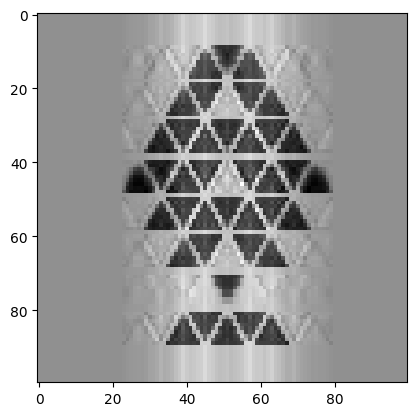

In [52]:
F = np.dot(X_loading, X_reduced.T)
p = pd.DataFrame(F)
F
plt.imshow(F.T, cmap='gray')
plt.show()

Вывод: мы научились работать с методом главных компонент